In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly_express as px
import math

## Initial Data Info

In [2]:
wta2017df= pd.read_csv("../data/orig/wta_matches_2017.csv")
wta2017df.shape

(2181, 49)

In [3]:
wta2017df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2017-1049,Auckland,Hard,32,I,20170102,300,201616,NaN,NaN,...,3.0,2.0,5.0,51.0,23.0,14.0,10.0,8.0,3.0,8.0
1,2017-1049,Auckland,Hard,32,I,20170102,299,201616,NaN,NaN,...,15.0,5.0,10.0,76.0,46.0,31.0,8.0,12.0,5.0,10.0
2,2017-1049,Auckland,Hard,32,I,20170102,298,211951,8.0,NaN,...,9.0,7.0,4.0,91.0,51.0,35.0,19.0,14.0,8.0,12.0
3,2017-1049,Auckland,Hard,32,I,20170102,297,211533,7.0,NaN,...,10.0,0.0,2.0,68.0,39.0,22.0,10.0,10.0,5.0,11.0
4,2017-1049,Auckland,Hard,32,I,20170102,296,201616,NaN,NaN,...,7.0,1.0,3.0,65.0,45.0,28.0,5.0,9.0,6.0,10.0


## Identifying Null height values to manually input heights from the WTA database

In [4]:
wta2017df[wta2017df['winner_ht'].isnull()]['winner_name'].count()

1007

In [5]:
wta2017df[wta2017df['loser_ht'].isnull()]['loser_name'].count()

1237

In [6]:
wta2017df['winner_ht'].value_counts()

177.0    119
174.0    112
180.0     88
184.0     85
182.0     83
168.0     82
185.0     79
170.0     74
173.0     72
164.0     48
178.0     46
176.0     41
181.0     29
175.0     28
162.0     26
166.0     24
161.0     23
172.0     23
157.0     19
165.0     18
183.0     15
179.0     12
163.0     10
159.0      9
169.0      7
167.0      2
Name: winner_ht, dtype: int64

In [7]:
wta2017df[wta2017df['winner_ht'].isnull()]['winner_name'].value_counts()

Johanna Konta               37
Anastasija Sevastova        35
Caroline Garcia             33
Jelena Ostapenko            31
Daria Gavrilova             28
Elise Mertens               26
Ashleigh Barty              24
Anett Kontaveit             24
Darya Kasatkina             22
Ana Konjuh                  22
Kristyna Pliskova           21
Katerina Siniakova          21
Qiang Wang                  21
Shelby Rogers               21
Mirjana Lucic               20
Alison Riske                19
Timea Bacsinszky            18
Naomi Osaka                 17
Yulia Putintseva            17
Catherine Cartan Bellis     17
Carina Witthoeft            16
Donna Vekic                 16
Shuai Zhang                 14
Ying Ying Duan              14
Aliaksandra Sasnovich       14
Monica Puig                 13
Oceane Dodin                13
Maria Sakkari               13
Laura Siegemund             13
Magda Linette               12
                            ..
Elitsa Kostova               1
Riko Saw

__I can now go into the original data set and add the appopriate heights for each of these players__

## Working with the New Data Set after Inputting heights

In [8]:
wta2017df= pd.read_csv("../data/clean/wta_matches_2017(1).csv")
wta2017df.shape

(2181, 49)

In [9]:
wta2017df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'winner_rank', 'winner_rank_points', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'loser_rank', 'loser_rank_points', 'score', 'best_of',
       'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced'],
      dtype='object')

## Inputting a Number of Sets Column into the New Data Set

In [10]:
wta2017df['num_sets']=wta2017df['score'].str.count('-')

In [11]:
wta2017df.head(5)['score']

0            6-3 6-1
1    4-6 6-4 4-1 RET
2        6-3 4-6 6-3
3            7-5 6-3
4         6-1 7-6(4)
Name: score, dtype: object

In [12]:
wta2017df.head(5)['num_sets']

0    2
1    3
2    3
3    2
4    2
Name: num_sets, dtype: int64

## Confirming that the New Data Has Less Null Heights

In [13]:
wta2017df[wta2017df['loser_ht'].isnull()]['loser_name'].count()

373

373 < 1237 so the loser nulls have decreased

In [14]:
wta2017df[wta2017df['winner_ht'].isnull()]['winner_name'].count()

152

152 < 1007 so the winner nulls have decreased

## Saving the New Data Set

In [15]:
wta2017df.to_csv('../data/clean/wta_matches_2017.csv', index=False)

## Initial Histograms comparing Winners v. Losers distribution of key variables

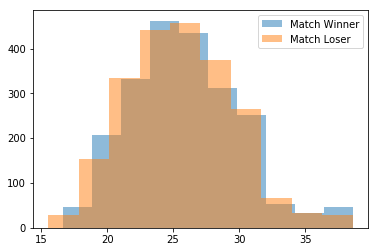

In [16]:
plt.hist(wta2017df['winner_age'], alpha=0.5, label='Match Winner')
plt.hist(wta2017df['loser_age'], alpha=0.5, label='Match Loser')
plt.legend(loc='upper right')
plt.show()

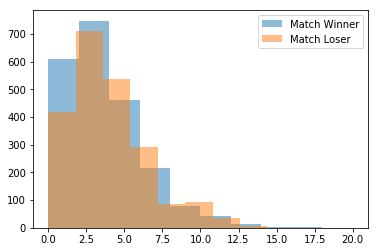

In [17]:
plt.hist(wta2017df['w_df'], alpha=0.5, label='Match Winner')
plt.hist(wta2017df['l_df'], alpha=0.5, label='Match Loser')
plt.legend(loc='upper right')
plt.show()

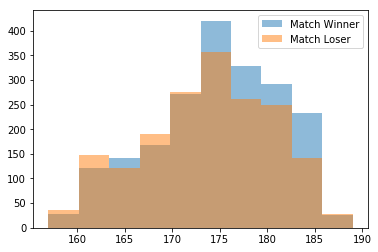

In [18]:
plt.hist(wta2017df['winner_ht'], alpha=0.5, label='Match Winner')
plt.hist(wta2017df['loser_ht'], alpha=0.5, label='Match Loser')
plt.legend(loc='upper right')
plt.show()

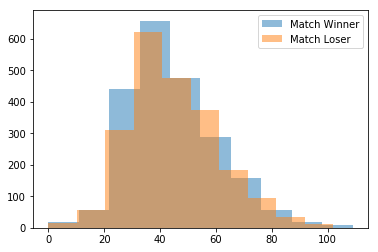

In [19]:
plt.hist(wta2017df['w_1stIn'], alpha=0.5, label='Match Winner')
plt.hist(wta2017df['l_1stIn'], alpha=0.5, label='Match Loser')
plt.legend(loc='upper right')
plt.show()

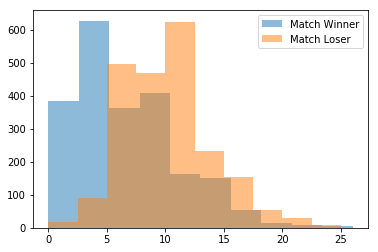

In [20]:
plt.hist(wta2017df['w_bpFaced'], alpha=0.5, label='Match Winner')
plt.hist(wta2017df['l_bpFaced'], alpha=0.5, label='Match Loser')
plt.legend(loc='upper right')
plt.show()

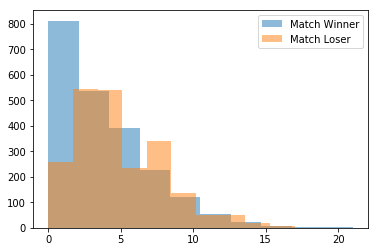

In [21]:
plt.hist(wta2017df['w_bpSaved'], alpha=0.5, label='Match Winner')
plt.hist(wta2017df['l_bpSaved'], alpha=0.5, label='Match Loser')
plt.legend(loc='upper right')
plt.show()

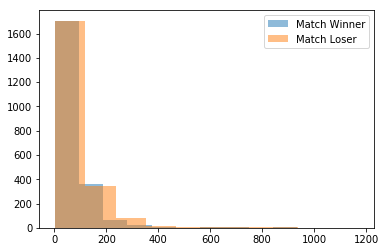

In [22]:
plt.hist(wta2017df['winner_rank'], alpha=0.5, label='Match Winner')
plt.hist(wta2017df['loser_rank'], alpha=0.5, label='Match Loser')
plt.legend(loc='upper right')
plt.show()

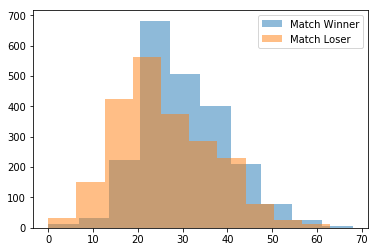

In [23]:
plt.hist(wta2017df['w_1stWon'], alpha=0.5, label='Match Winner')
plt.hist(wta2017df['l_1stWon'], alpha=0.5, label='Match Loser')
plt.legend(loc='upper right')
plt.show()

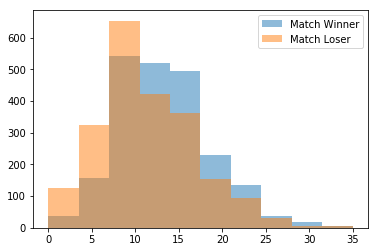

In [24]:
plt.hist(wta2017df['w_2ndWon'], alpha=0.5, label='Match Winner')
plt.hist(wta2017df['l_2ndWon'], alpha=0.5, label='Match Loser')
plt.legend(loc='upper right')
plt.show()